In [1]:
import requests

from urllib.parse import quote_plus, unquote_plus



In [2]:
query = input()

In [3]:
base_uri = 'https://ru.wikipedia.org'

In [4]:
def get_article(query: str):
	url = f'{base_uri}/w/api.php?action=parse&page={query}&format=json'
	response = requests.get(url)
	data = response.json()
	return data

In [5]:
article = get_article(query)

In [6]:
import bs4

def get_parsed_html(article: dict) -> bs4.BeautifulSoup:
	html = article['parse']['text']['*']
	soup = bs4.BeautifulSoup(html, 'html.parser')
	return soup

def find_important_links(soup: bs4.BeautifulSoup) -> list:
	links = []
	soup = soup.find('div', class_='mw-parser-output')
	first_p = soup.find('p', recursive=False)
	second_p = first_p.find_next_sibling('p', recursive=False)

	a_tags = first_p.find_all('a', href=True)
	if second_p is not None:
		a_tags += second_p.find_all('a', href=True)

	for a in a_tags:
		href = a.get('href')
		if href.startswith('/wiki/') and not href.startswith(f'/wiki/{quote_plus('Файл')}:'):
			links.append({
				'title': a.get('title') if a.get('title') else a.text,
				'href': href
			})
	return links

In [7]:
soup = get_parsed_html(article)

graph = {}

links = find_important_links(soup)

for link in links:
	print(link['title'])
	child_article = get_article(link['title'])
	if 'parse' in article:
		if 'text' in child_article['parse']:
			soup = get_parsed_html(child_article)
			links_in_child_article = find_important_links(soup)
			graph[link['title']] = links_in_child_article
			for link_in_child_article in links_in_child_article:
				print(f'\t{link_in_child_article['title']}')

print(graph)


Международный фонетический алфавит
	Английский язык
	Французский язык
	Фонетическая транскрипция
	Международная фонетическая ассоциация
	Лингвист
	Логопедия
	Певец
	Актёр
	Лексикография
	Перевод
	Устная речь
	Фонема
	Интонация (лингвистика)
	Слово
	Слог
	Расщепление нёба
Город
	Населённый пункт
	Статус города
	Земляной вал
	Городские стены
	Киевская Русь
	Населённый пункт
	Искусство
	Ремесло
Европейская часть России
	Территория
	Россия
	Европа
	Славяне
	Финно-угорские народы
	Балты
	Германоязычные народы
	Тюрки
	Народы Кавказа
Россия
	Государство
	Восточная Европа
	Северная Азия
	Список государств и зависимых территорий по площади
	Население России
	Передача Крымской области из состава РСФСР в состав УССР
	Крым
	Захват Крыма Россией
	Аннексия Крыма Российской Федерацией
	Санкции против России (2014)
	Список стран по населению
	Москва
	Официальный язык
	Русский язык
	Государственные и официальные языки в субъектах Российской Федерации
	Российский рубль
Предуралье
	Урал
	Кама
	Печора (ре

In [9]:
import graphviz

dot = graphviz.Digraph()
dot.node(query)

for parent, children in graph.items():
	dot.node(parent)
	dot.edge(query, parent)
	for child in children:
		dot.node(child['title'])
		dot.edge(parent, child['title'])


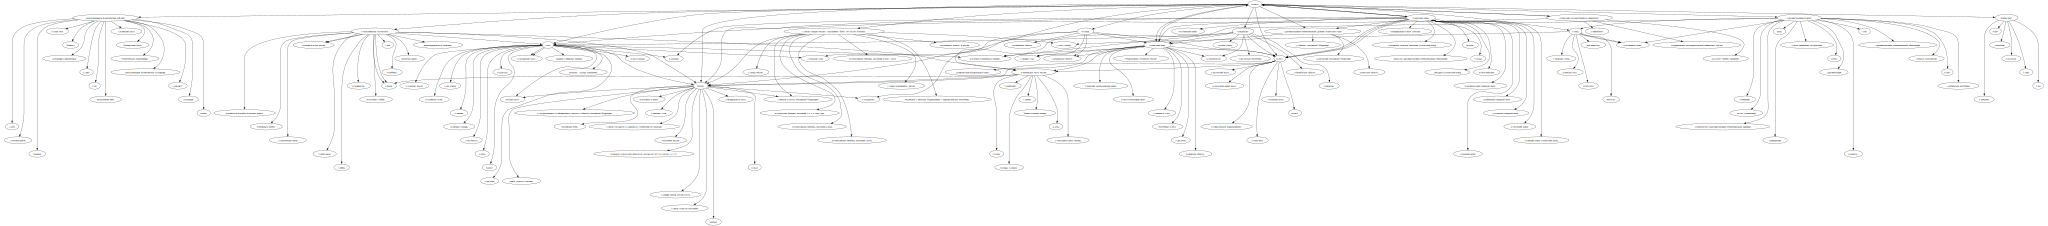

In [10]:
dot.unflatten(stagger=10)